In [3]:
from sklearn import cross_validation, datasets, metrics, neighbors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Метод k ближайших соседей

In [68]:
n_samples = 200

In [69]:
classification_problem = datasets.make_classification(n_samples=n_samples, 
                                                      n_features=2, 
                                                      n_classes=4, n_redundant=0, 
                                                      n_clusters_per_class=1, 
                                                      random_state=10)

In [36]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(
    classification_problem[0], classification_problem[1], test_size = 0.3, 
    random_state = 13)

In [37]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [38]:
colors = ListedColormap(['red', 'blue', 'green', 'grey'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen', 'lightgrey'])

In [42]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(
        np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(
        metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:,0], test_data[:,1], c=test_labels, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(
        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [43]:
neighb = [1, 2, 5, 7, 10, 20, 50]

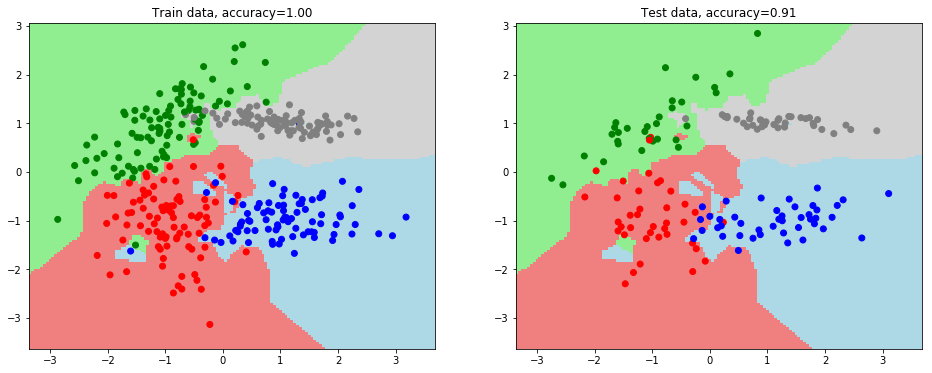

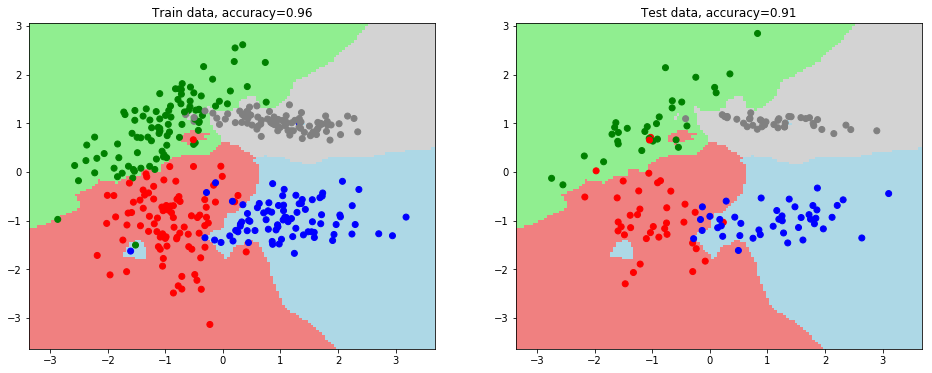

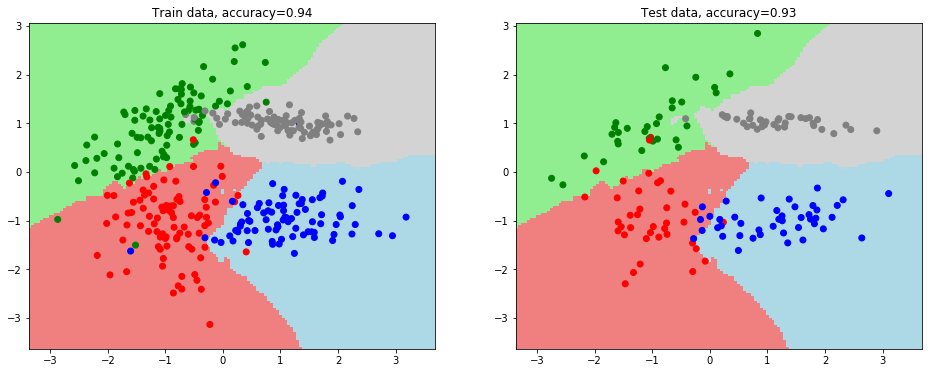

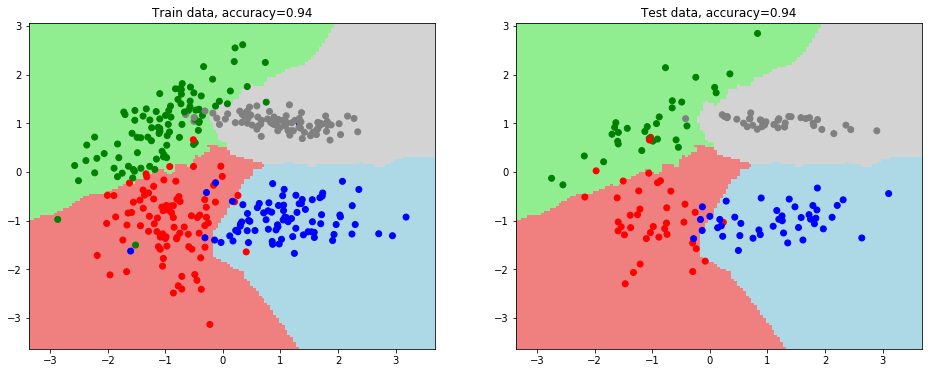

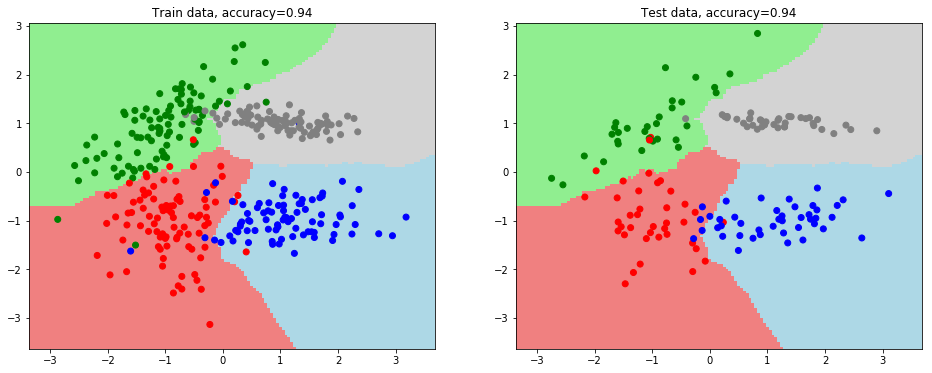

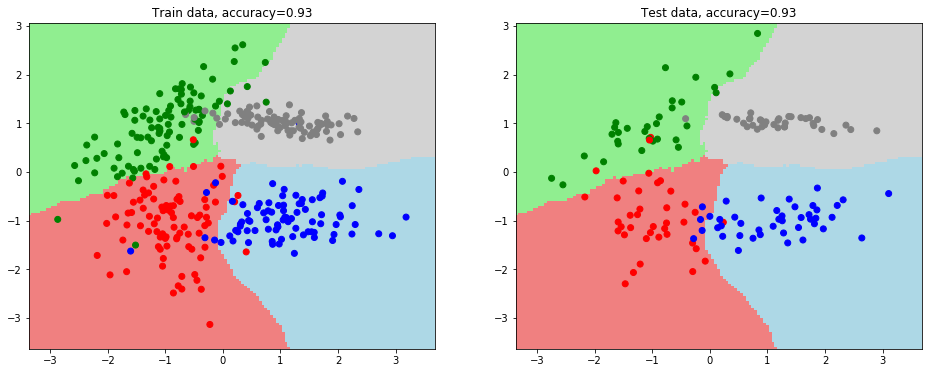

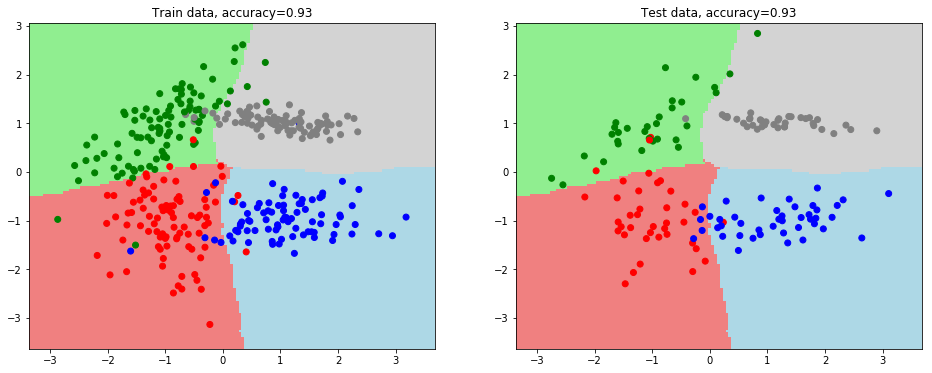

In [44]:
for n in neighb:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=n)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

### 5-fold cross-validation

In [85]:
def get_accuracies(n_samples, k_max):
    accuracy = []
    for k in xrange(2, k_max+1):
        current_acc = 0
        classification_problem = datasets.make_classification(n_samples=n_samples, 
                                                      n_features=2, 
                                                      n_classes=4, n_redundant=0, 
                                                      n_clusters_per_class=1, 
                                                      random_state=10)
        for train_indices, test_indices in cross_validation.KFold(n_samples, 
                                                                  n_folds=5, 
                                                                  shuffle=True, 
                                                                  random_state=10):
            train_data = classification_problem[0][train_indices]
            train_labels = classification_problem[1][train_indices]
            est = neighbors.KNeighborsClassifier(n_neighbors=k)
            est.fit(train_data, train_labels)

            test_data = classification_problem[0][test_indices]
            test_labels = classification_problem[1][test_indices]
            current_acc += metrics.accuracy_score(test_labels, est.predict(test_data))
        accuracy.append(current_acc / 5)
    return accuracy

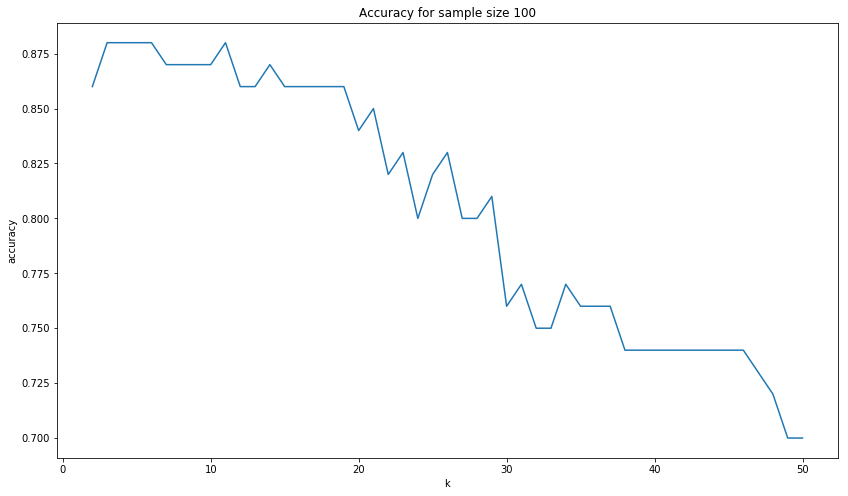

Максимум достигается при k = 2.


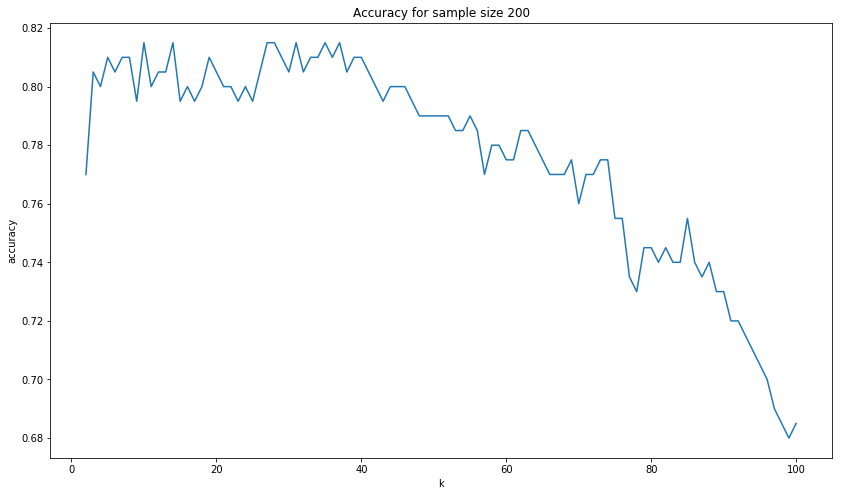

Максимум достигается при k = 8.


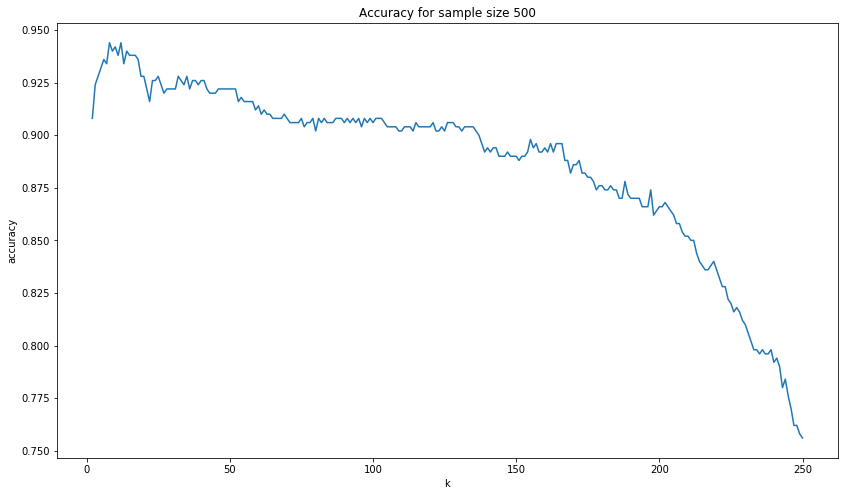

Максимум достигается при k = 6.


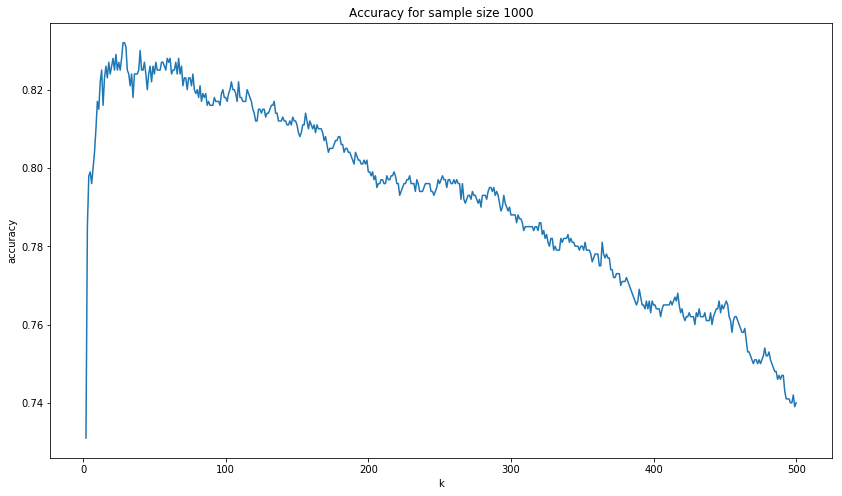

Максимум достигается при k = 26.


In [86]:
for size in [100, 200, 500, 1000]:
    plt.figure(figsize = (14, 8))
    k_max = size / 2
    accuracy = np.array(get_accuracies(size, k_max))
    plt.plot(np.array(range(2, k_max+1)), accuracy)
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('Accuracy for sample size {}'.format(size))
    plt.show()
    print "Максимум достигается при k = {}.".format(np.argmax(accuracy))

Таким образом, оптимальное значение количества соседей различно при различных размерах выборки, но для размеров, близких к рассмотренным, лучше брать чётное порядка sample_size / 50.

## Наивный байесовский классификатор

In [24]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score as cvs
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import numpy as np

%matplotlib inline

In [15]:
digits = datasets.load_digits()
# в этот момент я обновила sklearn, потому что breast_cancer в версии 0.15 нет
cancer = datasets.load_breast_cancer()

In [16]:
digits.data[:2]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

Признаки - натуральные числа.

In [17]:
cancer.data[:2]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

Признаки вещественные положительные.

In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [27]:
clfB = BernoulliNB()
clfM = MultinomialNB()
clfG = GaussianNB()
for clf, clf_name in zip([clfB, clfM, clfG], ["Bernoulli", "Multinomial",  "Gaussian"]):
    for dataset, ds_name in zip([digits, cancer], ["digits", "breast cancer"]):
        print "{} for {}: {:.3}".format(clf_name, ds_name, np.mean(cvs(
            clf, dataset.data, dataset.target)))

Bernoulli for digits: 0.826
Bernoulli for breast cancer: 0.627
Multinomial for digits: 0.871
Multinomial for breast cancer: 0.895
Gaussian for digits: 0.819
Gaussian for breast cancer: 0.937


Бернуллиевский классификатор предназначен для работы с бинарными признаками, поэтому неудивительно, что он так плохо работает с вещественными значениями и лучше, но не слишком хорошо - с натуральными.

Итого лучшее качество для классификации цифр показал мультиномиальный наивный байесовский классификатор, для диагнозирования рака - гауссовский. Верно утверждение d - "На вещественных признаках лучше всего сработало нормальное распределение"; мультиномиальное распределение показало себя на выборке с целыми неотрицательными значениями признаков лучше остальных, но хуже, чем на выборке с вещественными значениями признаков, поэтому в зависимости от вложенного смысла утверждение с получается верно или неверно.

## Метрики в задаче регрессии

In [28]:
from scipy.stats import norm

In [44]:
sigma_2 = 0.2
size = 500
x = np.linspace(0., 10., size)
y = 0.5 * x + 1 + norm(0, sigma_2).rvs(size=size)

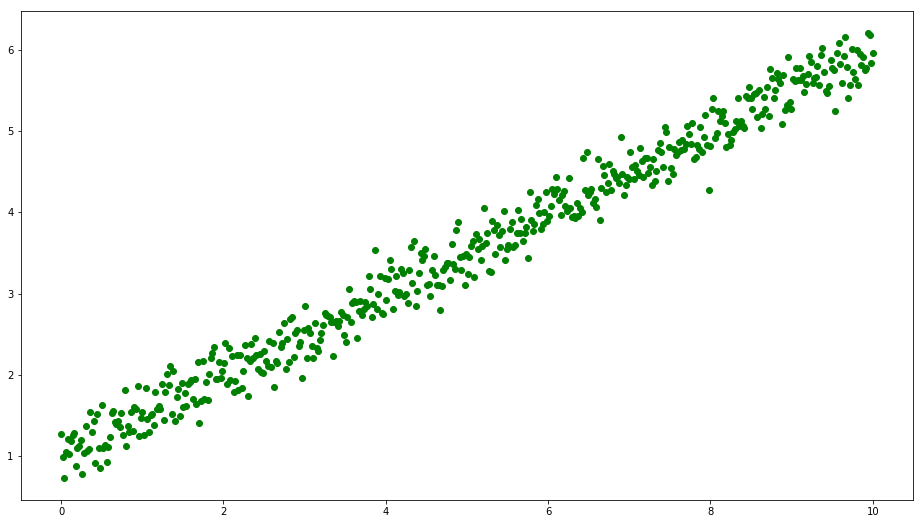

In [48]:
plt.figure(figsize = (16, 9))
plt.plot(x, y, 'o', c='g')
plt.show()